In [20]:
import numpy as np
import matplotlib.pyplot as plt
import data
import wifi_label_utils

In [21]:

def viewer(filename):
    data_obj = data.Data(filename)
    iq_samples = data_obj.get_samples(n_samples=int(data_obj.metadata["global"]["core:sample_rate"]*1))
    
    avg_window_len = 256
    
    # To debug or determine threshold 
    avg_pwr = wifi_label_utils.moving_average(iq_samples, avg_window_len)
    avg_pwr_db = 10*np.log10(avg_pwr)
    plt.figure()
    plt.plot(avg_pwr_db[int(0*20480000e-2):int(30*20480000e-2)])
    plt.show()
    
    # determine threshold from examing plot 
    # threshold = -56
    
    # wifi_label_utils.annotate_power_squelch(data_obj, threshold, avg_window_len)

In [18]:
ax_gain10_243 = "data/gamutrf/gamutrf-nz-wifi/gamutrf_ax_gain10_2430000000Hz_20480000sps.raw.sigmf-meta"
ax_gain10_518 = "data/gamutrf/gamutrf-nz-wifi/gamutrf_ax_gain10_5180000000Hz_20480000sps.raw.sigmf-meta"
ax_gain60_243 = "data/gamutrf/gamutrf-nz-wifi/gamutrf_ax_gain60_2430000000Hz_20480000sps.raw.sigmf-meta"
ax_gain60_518 = "data/gamutrf/gamutrf-nz-wifi/gamutrf_ax_gain60_5180000000Hz_20480000sps.raw.sigmf-meta"



Loaded 
 Data file: data/gamutrf/gamutrf-nz-wifi/gamutrf_ax_gain10_2430000000Hz_20480000sps.raw.sigmf-data 
 SigMF-Meta file: data/gamutrf/gamutrf-nz-wifi/gamutrf_ax_gain10_2430000000Hz_20480000sps.raw.sigmf-meta



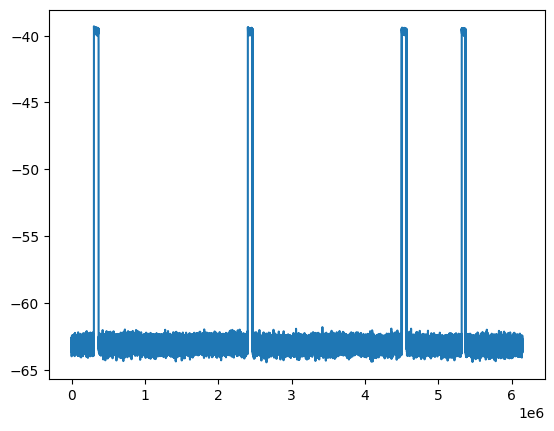

In [22]:
viewer(ax_gain10_243)


Loaded 
 Data file: data/gamutrf/gamutrf-nz-wifi/gamutrf_ax_gain10_5180000000Hz_20480000sps.raw.sigmf-data 
 SigMF-Meta file: data/gamutrf/gamutrf-nz-wifi/gamutrf_ax_gain10_5180000000Hz_20480000sps.raw.sigmf-meta



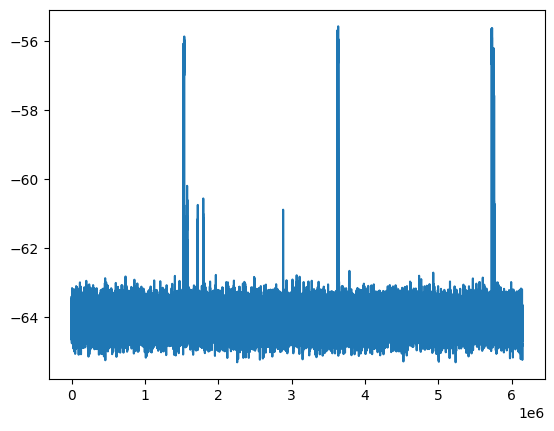

In [23]:
viewer(ax_gain10_518)


Loaded 
 Data file: data/gamutrf/gamutrf-nz-wifi/gamutrf_ax_gain60_2430000000Hz_20480000sps.raw.sigmf-data 
 SigMF-Meta file: data/gamutrf/gamutrf-nz-wifi/gamutrf_ax_gain60_2430000000Hz_20480000sps.raw.sigmf-meta



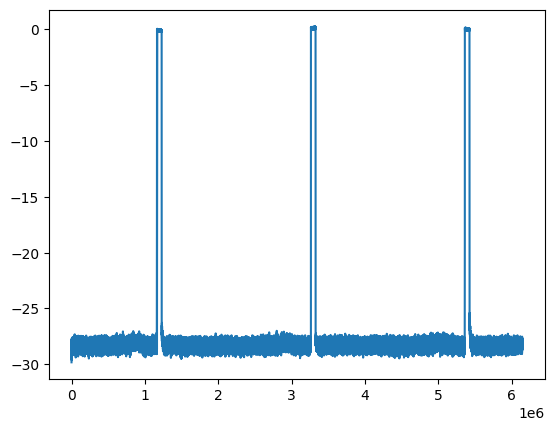

In [24]:
viewer(ax_gain60_243)


Loaded 
 Data file: data/gamutrf/gamutrf-nz-wifi/gamutrf_ax_gain60_5180000000Hz_20480000sps.raw.sigmf-data 
 SigMF-Meta file: data/gamutrf/gamutrf-nz-wifi/gamutrf_ax_gain60_5180000000Hz_20480000sps.raw.sigmf-meta



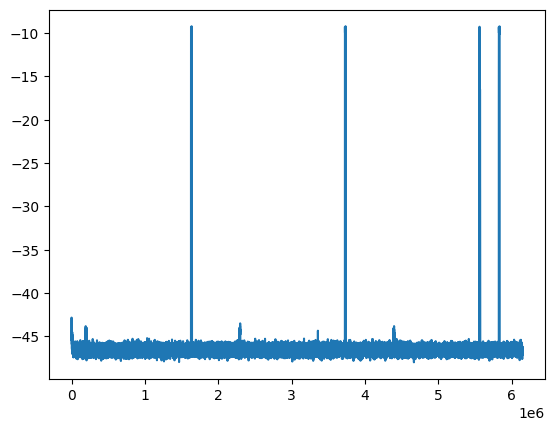

In [25]:
viewer(ax_gain60_518)